<a href="https://colab.research.google.com/github/dlckdtn62/BIO-PREDICTION/blob/master/bio_basic_code_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 현재 kfold까지해서 좋은 결과발생

# 앞으로의 방향
Feature Engineering이 필요한 상황
스펙트럼 파장의 길이 값이므로
진폭, 주기 진동수 등을 생각해보고
이들간의 계산이 어떻게 들어가는지도 추가

http://www.ktword.co.kr/abbr_view.php?id=5&m_temp1=1898

rho를 어떻게 써먹을 것인가? 
rho에 따라서 어떻게 달라지는지 잘 모르겠음

그리고 비어있는 결측치를 채울 수 있는 다른 방법을 더 찾을 수 있으면 더 좋을 것 같음!


In [4]:
import pandas as pd
import numpy as np
import lightgbm as lgbm

import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
path = "/content/drive/My Drive/dacon/bio/"

In [0]:
train = pd.read_csv(path+'train.csv')
test = pd.read_csv(path+'test.csv')
sample_submission = pd.read_csv(path+'sample_submission.csv')

In [7]:
"""
id : 구분자
rho : 측정 거리 (단위: mm)
src : 광원 스펙트럼 (650 nm ~ 990 nm)
dst : 측정 스펙트럼 (650 nm ~ 990 nm)
hhb : 디옥시헤모글로빈 농도
hbo2 : 옥시헤모글로빈 농도
ca : 칼슘 농도
na : 나트륨 농도
"""

'\nid : 구분자\nrho : 측정 거리 (단위: mm)\nsrc : 광원 스펙트럼 (650 nm ~ 990 nm)\ndst : 측정 스펙트럼 (650 nm ~ 990 nm)\nhhb : 디옥시헤모글로빈 농도\nhbo2 : 옥시헤모글로빈 농도\nca : 칼슘 농도\nna : 나트륨 농도\n'

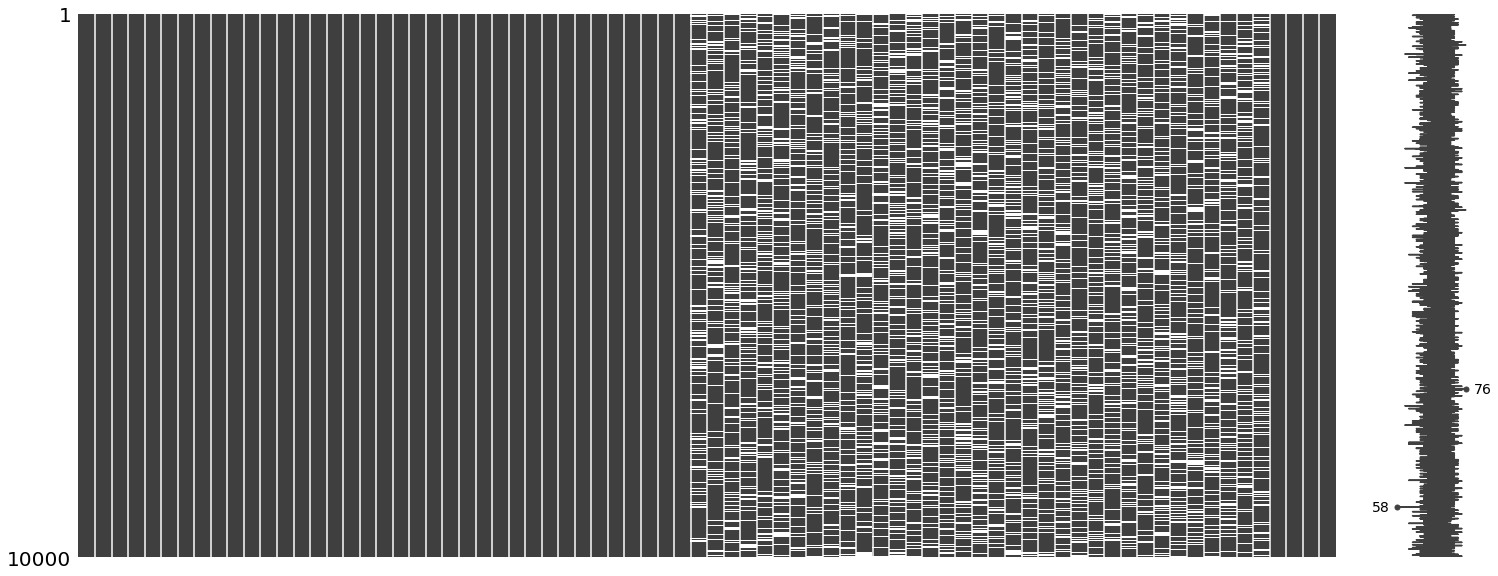

In [8]:
import missingno as msno
msno.matrix(train)

In [9]:
train.head()

,id,rho,650_src,660_src,670_src,680_src,690_src,700_src,710_src,720_src,730_src,740_src,750_src,760_src,770_src,780_src,790_src,800_src,810_src,820_src,830_src,840_src,850_src,860_src,870_src,880_src,890_src,900_src,910_src,920_src,930_src,940_src,950_src,960_src,970_src,980_src,990_src,650_dst,660_dst,670_dst,680_dst,690_dst,700_dst,710_dst,720_dst,730_dst,740_dst,750_dst,760_dst,770_dst,780_dst,790_dst,800_dst,810_dst,820_dst,830_dst,840_dst,850_dst,860_dst,870_dst,880_dst,890_dst,900_dst,910_dst,920_dst,930_dst,940_dst,950_dst,960_dst,970_dst,980_dst,990_dst,hhb,hbo2,ca,na
0,0,25,0.37950,0.42993,0.52076,0.57166,0.67818,0.75476,0.83580,0.93623,0.96333,1.01541,0.99865,0.94373,0.84513,0.74023,0.68776,0.57697,0.51536,0.43508,0.36501,0.34935,0.30038,0.26992,0.23192,0.21998,0.19920,0.14493,0.13150,0.12442,0.10786,0.11984,0.09851,0.10965,0.07424,0.07777,0.05536,2.447758e-18,1.894578e-18,0.000000e+00,6.412913e-18,1.098559e-17,8.907142e-19,NaN,0.000000e+00,NaN,0.000000e+00,5.901745e-18,NaN,1.176812e-18,NaN,5.557492e-17,1.046498e-16,NaN,7.236748e-17,4.021610e-17,2.397489e-17,1.870153e-17,1.808920e-17,NaN,0.000000e+00,2.626216e-18,NaN,3.527371e-18,NaN,6.455564e-19,NaN,0.000000e+00,NaN,1.067504e-18,5.998949e-18,4.378513e-17,5.59,4.32,8.92,4.29
1,1,10,0.00000,0.00000,0.01813,0.00000,0.00000,0.01974,0.00321,0.00000,0.00000,0.01295,0.00000,0.01565,0.00000,0.00000,0.01285,0.01129,0.00359,0.00000,0.00000,0.00000,0.00000,0.00000,0.04466,0.10738,0.21646,0.41456,0.63716,0.84230,0.97480,0.99803,0.97146,0.87045,0.75330,0.63414,0.53699,0.000000e+00,0.000000e+00,0.000000e+00,1.995530e-10,1.025259e-10,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,1.151021e-10,4.318673e-10,2.753933e-10,0.000000e+00,8.138830e-10,6.522110e-10,NaN,2.732232e-10,NaN,7.663267e-11,NaN,1.389496e-10,1.472282e-09,1.450463e-09,1.225321e-09,2.647633e-09,NaN,5.233480e-09,1.264238e-08,1.343132e-08,6.112685e-09,2.130547e-09,NaN,9.710091e-09,NaN,0.00,2.83,7.25,4.64
2,2,25,0.00000,0.03289,0.02416,0.03610,0.05843,0.09015,0.14944,0.18578,0.25584,0.30445,0.38962,0.50472,0.56934,0.67742,0.79720,0.87593,0.92783,0.99498,0.98682,0.98988,0.95101,0.89853,0.79813,0.68262,0.58043,0.46222,0.39113,0.27879,0.19070,0.16603,0.11617,0.06744,0.02343,0.03926,0.03136,1.677445e-19,3.763590e-20,NaN,0.000000e+00,NaN,NaN,8.981651e-19,1.944683e-19,8.126907e-19,2.183200e-19,3.349335e-19,NaN,0.000000e+00,2.630961e-18,NaN,0.000000e+00,9.912979e-18,1.112747e-17,NaN,NaN,NaN,1.260239e-19,NaN,0.000000e+00,3.876159e-18,4.629125e-18,1.409413e-18,3.237480e-18,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.329725e-18,NaN,10.64,3.00,8.40,5.16
3,3,10,0.27503,0.31281,0.32898,0.41041,0.46587,0.52769,0.64369,0.73562,0.79865,0.91482,0.95274,0.99391,1.00563,0.93165,0.84703,0.74997,0.67765,0.58432,0.50642,0.43087,0.35684,0.30786,0.27722,0.24119,0.20158,0.17876,0.15139,0.15656,0.13392,0.14247,0.10126,0.09928,0.09239,0.10523,0.06349,4.044975e-11,NaN,5.345363e-11,9.106886e-12,1.881458e-11,3.617201e-11,7.909656e-13,NaN,1.583839e-10,NaN,1.678049e-10,2.814419e-10,4.429321e-10,1.319956e-09,2.269806e-09,2.679164e-09,2.538200e-09,2.046841e-09,1.516820e-09,1.328007e-09,1.061359e-09,8.634016e-10,5.804951e-10,3.615067e-10,NaN,1.274876e-10,6.118947e-11,NaN,1.663888e-10,2.245998e-10,1.299511e-10,7.782625e-11,NaN,4.088921e-10,NaN,5.67,4.01,5.05,4.35
4,4,15,1.01521,1.00872,0.98930,0.98874,1.01773,1.01632,1.00009,0.98217,1.01564,1.00216,1.01190,1.00344,0.98365,1.01350,1.01649,0.98220,0.99091,0.99258,1.00175,0.98861,0.98270,1.00432,1.01434,1.01455,0.98861,0.98300,1.00616,0.99045,1.01321,1.01559,1.01072,0.99439,0.98597,0.99889,1.01412,4.784751e-14,NaN,0.000000e+00,1.153089e-13,0.000000e+00,0.000000e+00,1.056991e-13,0.000000e+00,0.000000e+00,2.666663e-14,1.493071e-14,NaN,0.000000e+00,1.200730e-13,2.648249e-13,NaN,4.392331e-13,2.831191e-13,4.557059e-13,1.326038e-13,1.864796e-13,1.419359e-13,1.765559e-13,1.593789e-13,NaN,0.000000e+00,NaN,1.537619e-14,4.996522e-14,1.457955e-13,8.769053e-14,NaN,1.330237e-13,NaN,NaN,11.9

# 그래프

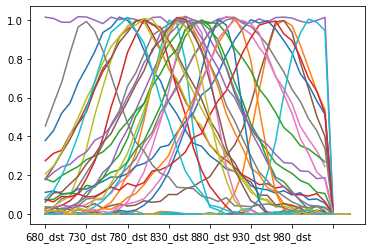

In [10]:
for i in range(30):
    train.iloc[i,2:40].plot()
for i in range(50):
    train.iloc[i,40:-4].plot()

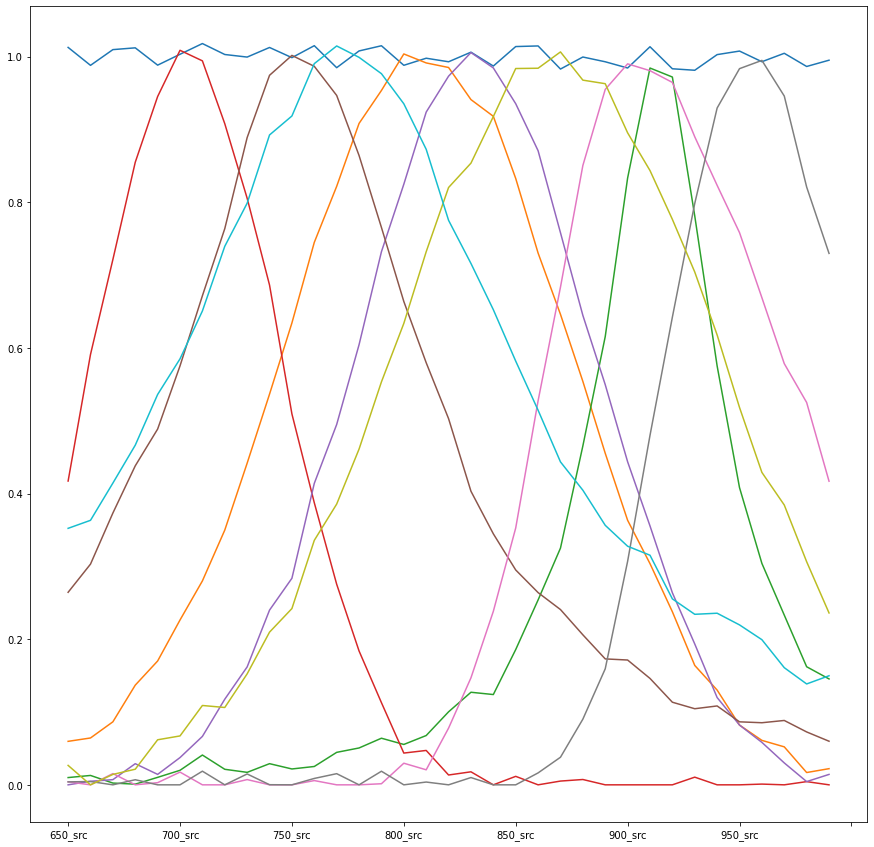

In [11]:
for i in range(10):
    train[train.rho == 10].iloc[i+30,2:2+35].plot(figsize=(15,15))
    # plt.show()

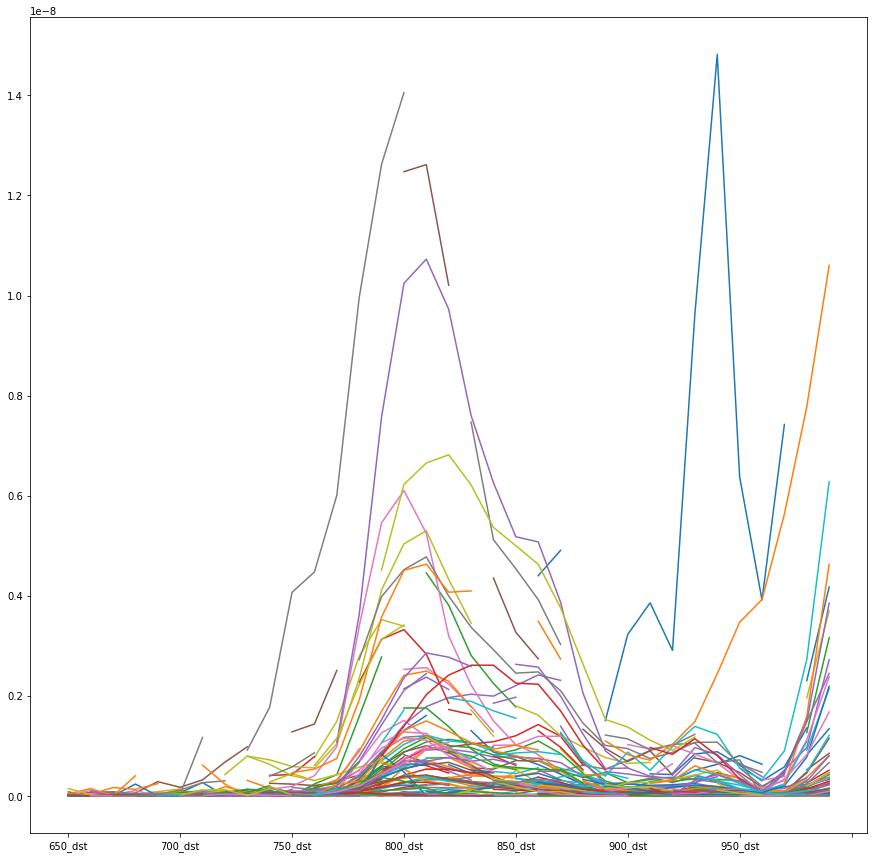

In [12]:
for i in range(100):
    test[test.rho == 10].iloc[i+50,2+35:2+35+35].plot(figsize=(15,15))
    # plt.show()

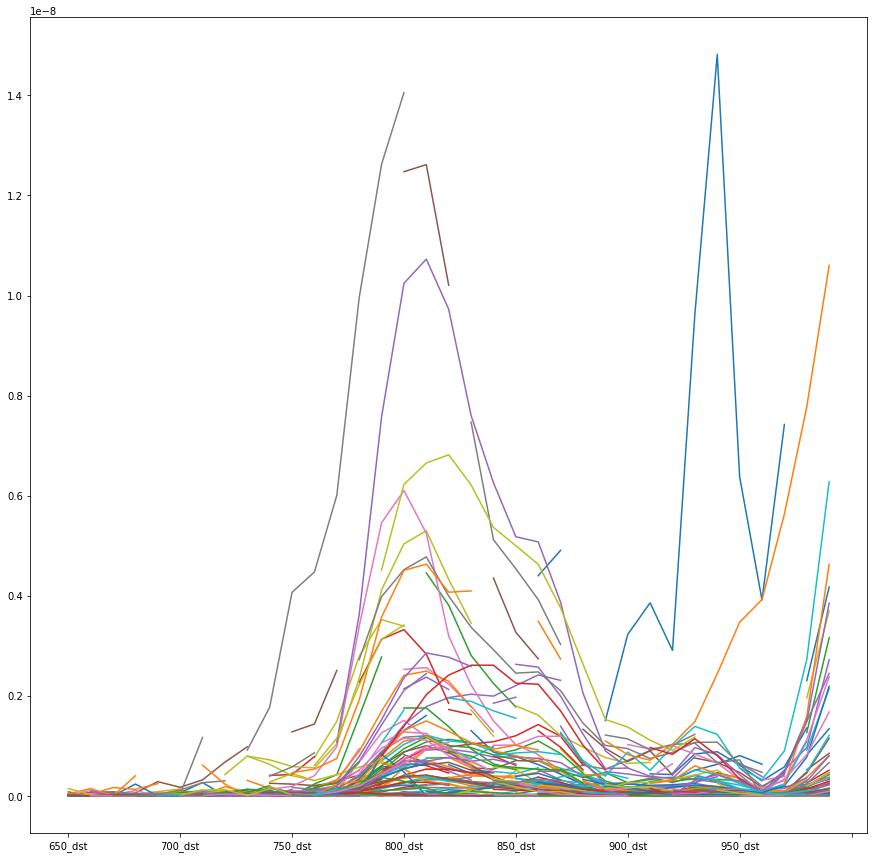

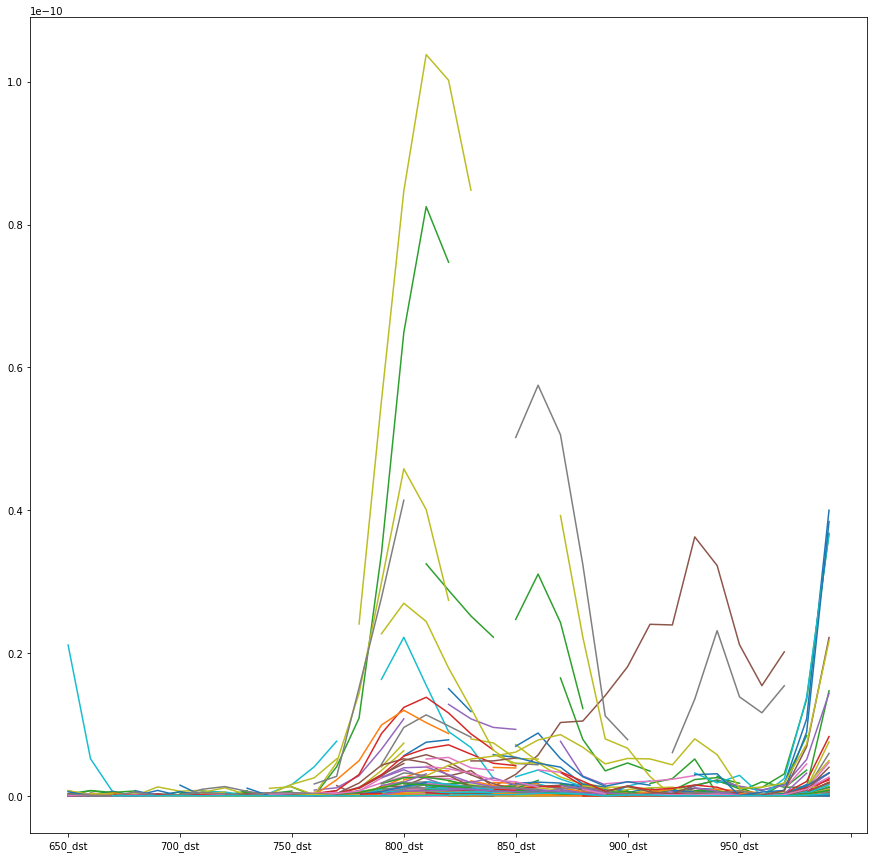

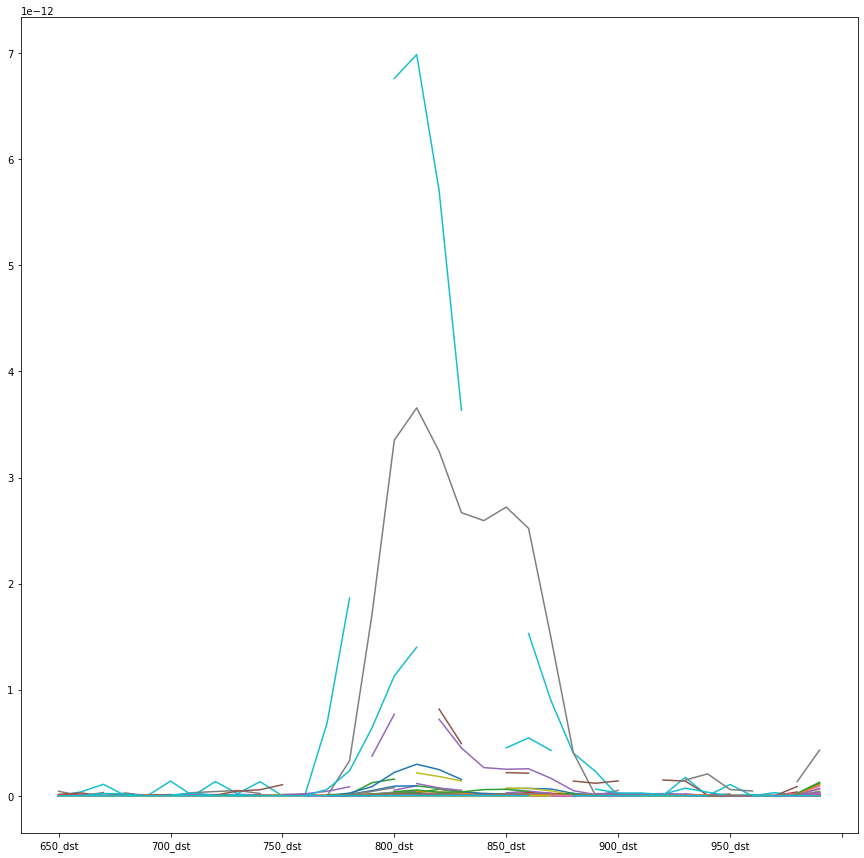

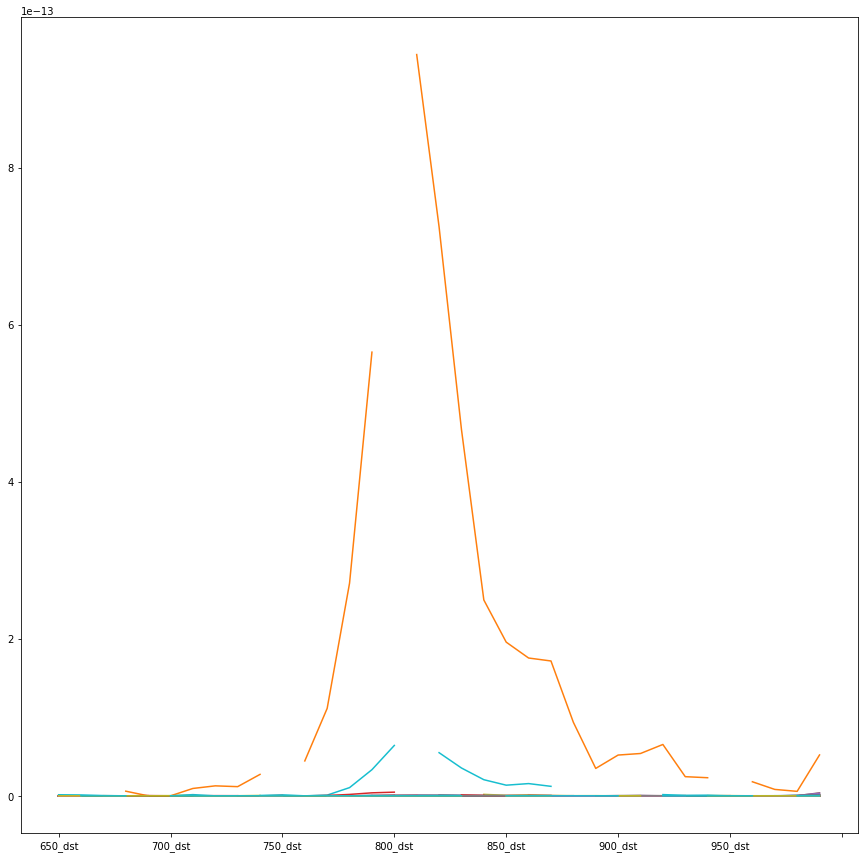

In [0]:
for i in range(100):
    test[test.rho == 10].iloc[i+50,2+35:2+35+35].plot(figsize=(15,15))
plt.show()    

for i in range(100):
    test[test.rho == 15].iloc[i+50,2+35:2+35+35].plot(figsize=(15,15))
plt.show()    

for i in range(100):
    test[test.rho == 20].iloc[i+50,2+35:2+35+35].plot(figsize=(15,15))
plt.show()    

for i in range(100):
    test[test.rho == 25].iloc[i+50,2+35:2+35+35].plot(figsize=(15,15))
plt.show()    

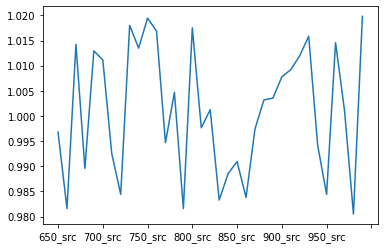

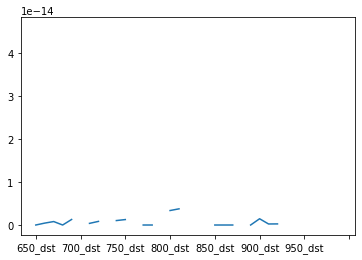

In [0]:

i=200
train.filter(regex='src').iloc[i].plot()
plt.show()

train.filter(regex='dst').iloc[i].plot()

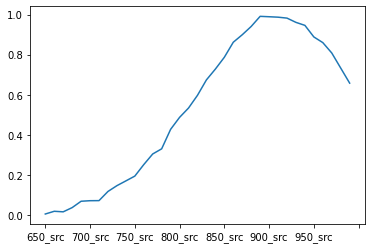

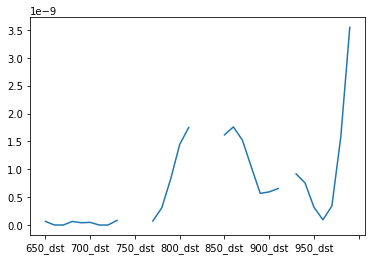

In [0]:
rho10 = train[train['rho']==10]
i=100
rho10.filter(regex='src').iloc[i].plot()
plt.show()

rho10.filter(regex='dst').iloc[i].plot()

In [0]:
train.iloc[5000:5001]

,id,rho,650_src,660_src,670_src,680_src,690_src,700_src,710_src,720_src,730_src,740_src,750_src,760_src,770_src,780_src,790_src,800_src,810_src,820_src,830_src,840_src,850_src,860_src,870_src,880_src,890_src,900_src,910_src,920_src,930_src,940_src,950_src,960_src,970_src,980_src,990_src,650_dst,660_dst,670_dst,680_dst,690_dst,700_dst,710_dst,720_dst,730_dst,740_dst,750_dst,760_dst,770_dst,780_dst,790_dst,800_dst,810_dst,820_dst,830_dst,840_dst,850_dst,860_dst,870_dst,880_dst,890_dst,900_dst,910_dst,920_dst,930_dst,940_dst,950_dst,960_dst,970_dst,980_dst,990_dst,hhb,hbo2,ca,na
5000,5000,15,0.45956,0.51888,0.56975,0.66418,0.73822,0.82678,0.90722,0.9393,1.01025,0.98702,0.97253,0.91447,0.85134,0.79325,0.71057,0.64444,0.56565,0.4892,0.45583,0.38014,0.32687,0.30371,0.28591,0.25746,0.21402,0.18467,0.17294,0.15774,0.14849,0.15721,0.12215,0.13421,0.10722,0.10981,0.09499,NaN,2.210704e-14,1.956075e-14,3.583311e-14,0.0,5.831913e-14,8.941214e-14,2.163051e-15,0.0,1.060226e-13,1.575558e-14,NaN,8.892919e-14,3.383112e-13,1.185761e-12,1.873997e-12,1.849502e-12,1.297897e-12,9.144567e-13,6.096957e-13,4.478430e-13,3.628347e-13,3.400740e-13,1.461900e-13,6.791808e-14,2.788370e-14,NaN,1.656313e-14,NaN,1.019711e-13,3.949172e-14,2.017155e-14,7.849003e-14,2.451064e-13,8.387024e-13,7.2,4.72,9.96,4.02


In [0]:
for i in range(len(train)-2):
    fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20,5))
    for j, col in enumerate(['hhb', 'hbo2', 'ca', 'na']):
        ax[j].scatter(train.iloc[:,i+2], train.loc[:,col])
    plt.show()


In [0]:
for i in range(100):
    fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20,5))
    for j, col in enumerate(['hhb', 'hbo2', 'ca', 'na']):
        ax[j].scatter(trainTransform.iloc[:,i+2], trainTransform.loc[:,col])
    plt.show()


In [0]:
 trainTransform.iloc[:,3]

0       0.42993
1       0.00000
2       0.03289
3       0.31281
4       1.00872
         ...   
9995    0.30265
9996    0.00946
9997    0.62976
9998    1.01504
9999    0.28182
Name: 660_src, Length: 10000, dtype: float64

In [0]:
for i in range(100):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
    ax[0].plot(trainTransform.filter(regex='src').iloc[i+2,:-4])
    ax[1].bar(['hhb', 'hbo2', 'ca', 'na'],trainTransform.loc[i+2,['hhb', 'hbo2', 'ca', 'na']])
    plt.plot()

# dst 결측치 채우는 방법 시도

1. row에서 990부분 결측치 먼저 0으로 일단 그냥 채움
2. 이후, 그냥 가장 오른쪽에 있는 값으로 bfill 해서 채워넣음


In [0]:
train_2 = train.copy()
train_2[train_2.filter(regex='990').columns] = train_2[train_2.filter(regex='990').columns].fillna(0)
trainTransform = train_2.T.fillna(method='bfill').T
test_2 = test.copy()
test_2[test_2.filter(regex='990').columns] = test_2[test_2.filter(regex='990').columns].fillna(0)
testTransform = test_2.T.fillna(method='bfill').T

In [0]:
# # col diff 추가
# # col div 추가
# src_cols = trainTransform.filter(regex='src').columns
# for i in range(len(src_cols)-1):
#     trainTransform[f'{src_cols[i+1]}-{src_cols[i]}'] = trainTransform[src_cols[i+1]] - trainTransform[src_cols[i]]
#     testTransform[f'{src_cols[i+1]}-{src_cols[i]}'] = testTransform[src_cols[i+1]] - testTransform[src_cols[i]]
#     trainTransform[f'{src_cols[i+1]}/{src_cols[i]}'] = trainTransform[src_cols[i+1]] / (trainTransform[src_cols[i]] + 1e-20)
#     testTransform[f'{src_cols[i+1]}/{src_cols[i]}'] = testTransform[src_cols[i+1]] / (testTransform[src_cols[i]] + 1e-20)

# dst_cols = trainTransform.filter(regex='dst').columns
# for i in range(len(dst_cols)-1):
#     trainTransform[f'{dst_cols[i+1]}-{dst_cols[i]}'] = trainTransform[dst_cols[i+1]] - trainTransform[dst_cols[i]]
#     testTransform[f'{dst_cols[i+1]}-{dst_cols[i]}'] = testTransform[dst_cols[i+1]] - testTransform[dst_cols[i]]
#     trainTransform[f'{dst_cols[i+1]}/{dst_cols[i]}'] = trainTransform[dst_cols[i+1]] / (trainTransform[dst_cols[i]] + 1e-20)
#     testTransform[f'{dst_cols[i+1]}/{dst_cols[i]}'] = testTransform[dst_cols[i+1]] / (testTransform[dst_cols[i]] + 1e-20)

In [29]:
trainTransform.head(1)
trainTransform.filter(regex='dst').T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9960,9961,9962,9963,9964,9965,9966,9967,9968,9969,9970,9971,9972,9973,9974,9975,9976,9977,9978,9979,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
650_dst,2.447758e-18,0.000000e+00,1.677445e-19,4.044975e-11,4.784751e-14,0.000000e+00,0.000000e+00,0.000000e+00,6.847028e-17,2.723855e-20,4.073736e-22,0.000000e+00,3.282509e-14,2.468582e-12,0.000000e+00,7.210768e-17,1.471178e-19,9.696022e-14,0.000000e+00,0.000000e+00,1.134285e-19,3.091025e-20,3.230614e-11,1.056062e-12,0.000000e+00,2.697818e-19,1.231161e-19,8.083862e-19,0.000000e+00,0.000000e+00,0.000000e+00,1.222045e-12,2.395555e-17,3.788086e-20,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.270996e-19,7.358321e-16,5.770257e-11,1.210934e-18,6.188627e-15,0.000000e+00,8.532628e-13,0.000000e+00,2.351780e-19,4.168293e-12,0.000000e+00,1.129091e-17,1.244581e-13,0.000000e+00,0.000000e+00,7.019335e-17,0.000000e+00,4.168110e-19,4.430407e-14,5.619065e-16,2.299411e-12,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.863896e-19,0.000000e+00,9.894366e-21,9.852483e-11,3.336028e-16,3.213054e-15,4.742603e-12,1.320794e-11,0.000000e+00,8.566442e-12,2.728013e-15,3.021131e-17,7.248393e-12,1.629438e-13,2.188296e-11
660_dst,1.894578e-18,0.000000e+00,3.763590e-20,5.345363e-11,0.000000e+00,0.000000e+00,0.000000e+00,2.331678e-18,6.847028e-17,3.795126e-19,0.000000e+00,2.689306e-18,1.062954e-15,3.794609e-12,0.000000e+00,7.780380e-17,4.290674e-22,7.953117e-14,0.000000e+00,0.000000e+00,1.134285e-19,1.134378e-20,3.230614e-11,0.000000e+00,1.747659e-13,6.292865e-19,4.480027e-19,5.776820e-19,6.511134e-14,0.000000e+00,0.000000e+00,0.000000e+00,2.395555e-17,5.889765e-19,0.000000e+00,0.000000e+00,3.758999e-17,2.538537e-12,0.000000e+00,0.000000e+00,...,2.270996e-19,0.000000e+00,0.000000e+00,6.539187e-19,6.188627e-15,0.000000e+00,0.000000e+00,2.382238e-12,6.534872e-20,0.000000e+00,0.000000e+00,1.321294e-17,1.138011e-13,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.350084e-19,0.000000e+00,0.000000e+00,1.230155e-11,0.000000e+00,3.183581e-17,3.053661e-11,0.000000e+00,8.802314e-19,0.000000e+00,2.987216e-21,6.498185e-12,0.000000e+00,1.889029e-15,1.121373e-11,7.024204e-13,0.000000e+00,8.566442e-12,1.438586e-14,3.021131e-17,0.000000e+00,1.531261e-14,0.000000e+00
670_dst,0.000000e+00,0.000000e+00,0.000000e+00,5.345363e-11,0.000000e+00,0.000000e+00,1.808480e-17,0.000000e+00,1.477517e-15,3.496313e-19,0.000000e+00,4.540026e-18,0.000000e+00,3.794609e-12,0.000000e+00,7.780380e-17,0.000000e+00,7.953117e-14,0.000000e+00,4.320040e-17,0.000000e+00,1.134378e-20,0.000000e+00,0.000000e+00,0.000000e+00,6.478533e-19,0.000000e+00,5.469629e-19,0.000000e+00,0.000000e+00,2.085126e-18,0.000000e+00,1.046729e-16,0.000000e+00,2.346100e-11,0.000000e+00,6.415248e-17,0.000000e+00,7.322156e-20,0.000000e+00,...,2.270996e-19,5.303196e-16,0.000000e+00,1.266893e-18,1.713128e-15,4.560651e-18,0.000000e+00,2.382238e-12,1.750602e-19,1.379808e-11,0.000000e+00,8.605261e-18,1.138011e-13,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.039197e-19,1.179836e-14,0.000000e+00,1.880725e-11,3.208940e-11,4.318401e-18,2.507099e-11,5.197267e-13,0.000000e+00,0.000000e+00,0.000000e+00,7.036575e-11,0.000000e+00,6.590359e-15,7.687178e-14,1.785193e-11,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.125747e-11,1.531261e-14,2.737677e-11
680_dst,6.412913e-18,1.995530e-10,0.000000e+00,9.106886e-12,1.153089e-13,0.000000e+00,1.808480e-17,2.714917e-18,1.396963e-15,3.496313e-19,6.999389e-20,0.000000e+00,2.158986e-14,1.973622e-12,0.000000e+00,6.983940e-17,0.000000e+00,4.885190e-14,0.000000e+00,0.000000e+00,0.000000e+00,8.531152e-21,0.000000e+00,0.000000e+00,6.663792e-14,1.436545e-19,0.000000e+00,5.469629e-19,2.066481e-13,3.264963e-11,0.000000e+00,0.000000e+00,1.046729e-16,4.162288e-19,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.188355e-20,7.081251e-11,.

#푸리에 변환 나중에 시도해보기

In [0]:
# pip install dfply

In [0]:
# from dfply import *

In [0]:
# fft_value = np.fft.fft(trainTransform.filter(regex='src').T[0])
# pd.Series(fft_value).plot()
# plt.show()
# pd.Series(fft_value.real).plot()
# plt.show()
# pd.Series(fft_value.imag).plot()
# plt.show()
# print(len(fft_value.real))
# print(len(fft_value.imag))

In [0]:
# train_2 = train.copy()
# train_2[train_2.filter(regex='990').columns] = train_2[train_2.filter(regex='990').columns].fillna(0)
# trainTransform = train_2.T.fillna(method='bfill').T
# test_2 = test.copy()
# test_2[test_2.filter(regex='990').columns] = test_2[test_2.filter(regex='990').columns].fillna(0)
# testTransform = test_2.T.fillna(method='bfill').T

In [0]:
# def add_FFT_columns(df, regex='src'):
#     src_df = df.filter(regex=regex)
#     fft = np.fft.fft(src_df.T)
    
#     real = pd.DataFrame(fft.real).T
#     imag = pd.DataFrame(fft.imag).T

#     real.columns = src_df.columns + '_freq_real'
#     imag.columns = src_df.columns + '_freq_imag'

#     added_df = pd.concat([df, real, imag], axis=1)

#     return added_df

In [0]:
# train_df = add_FFT_columns(trainTransform, 'src')
# train_df = add_FFT_columns(train_df, regex= 'dst')

# test_df = add_FFT_columns(testTransform, 'src')
# test_df = add_FFT_columns(test_df, regex='dst')

In [0]:
# # i=5000
# # train_df.filter(regex='src_freq').iloc[i].plot()
# # plt.show()
# # train_df.filter(regex='dst_freq').iloc[i].plot()
# train_df.head(1)

# x=100
# i = 2+35+39
# train_df.iloc[x,i:i+35].plot()
# train_df.iloc[x,i:i+35]

In [0]:
# sns.boxplot(data=train, x='rho', y='650_src')
# plt.show()
# sns.boxplot(data=test, x='rho', y='650_src')
# plt.show()

In [0]:
# sns.boxplot(data=train, x='rho', y='650_dst')
# plt.show()
# sns.boxplot(data=test, x='rho', y='650_dst')
# plt.show()

# MODEL

In [0]:
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from lightgbm import LGBMRegressor,  plot_importance
import lightgbm as lgbm
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler


import tensorflow as tf
import keras
from sklearn.preprocessing import OneHotEncoder

In [0]:
from keras.models import Sequential
from keras.layers import *

In [16]:
print(train.shape, test.shape)
test.head(3)

train2 = trainTransform.drop(['id'], axis=1)
test2 = testTransform.drop(['id'], axis=1)

from keras.utils import to_categorical

train2['rho']
conlist = [train2['rho']==10, train2['rho']==15,train2['rho']==20,train2['rho']==25]
choicelist = [0,1,2,3]
rho_label_encode = np.select(conlist, choicelist)
train2['rho'] = rho_label_encode

(10000, 76) (10000, 72)


In [0]:
category = to_categorical(train2['rho'])

train2_enc = pd.concat([pd.DataFrame(category), train2], axis=1)

In [0]:
test2['rho']
conlist = [test2['rho']==10, test2['rho']==15,test2['rho']==20,test2['rho']==25]
choicelist = [0,1,2,3]
rho_label_encode = np.select(conlist, choicelist)
test2['rho'] = rho_label_encode

category = to_categorical(test2['rho'])

test2_enc = pd.concat([pd.DataFrame(category), test2], axis=1)

In [0]:
train2_enc.drop(['rho'], axis=1, inplace=True, errors='ignore')
test2_enc.drop(['rho'], axis=1, inplace=True, errors='ignore')

In [20]:
print(test2_enc.shape)
test2_enc.head(3)

(10000, 74)


,0,1,2,3,650_src,660_src,670_src,680_src,690_src,700_src,710_src,720_src,730_src,740_src,750_src,760_src,770_src,780_src,790_src,800_src,810_src,820_src,830_src,840_src,850_src,860_src,870_src,880_src,890_src,900_src,910_src,920_src,930_src,940_src,950_src,960_src,970_src,980_src,990_src,650_dst,660_dst,670_dst,680_dst,690_dst,700_dst,710_dst,720_dst,730_dst,740_dst,750_dst,760_dst,770_dst,780_dst,790_dst,800_dst,810_dst,820_dst,830_dst,840_dst,850_dst,860_dst,870_dst,880_dst,890_dst,900_dst,910_dst,920_dst,930_dst,940_dst,950_dst,960_dst,970_dst,980_dst,990_dst
0,0.0,1.0,0.0,0.0,0.15406,0.23275,0.30977,0.42949,0.51264,0.62558,0.74340,0.85418,0.90815,0.95973,0.98963,1.00633,0.93637,0.90501,0.80721,0.67517,0.56850,0.47049,0.37681,0.28318,0.20309,0.14741,0.10475,0.05867,0.06330,0.02841,0.01290,0.00132,0.00000,0.00000,0.01904,0.00000,0.01952,0.00000,0.01285,0.000000e+00,7.028318e-15,7.028318e-15,2.191340e-14,2.191340e-14,2.191340e-14,2.204989e-14,0.000000e+00,0.000000e+00,1.306867e-15,7.064663e-14,7.064663e-14,9.958556e-14,2.511703e-13,8.145713e-13,7.970892e-13,7.970892e-13,7.970892e-13,2.803227e-13,2.803227e-13,1.466433e-13,5.927522e-14,5.927522e-14,2.185519e-14,0.000000e+00,0.000000e+00,0.000000e+00,1.432248e-14,0.000000e+00,0.000000e+00,6.332117e-15,1.429966e-14,0.000000e+00,7.320236e-14,7.320236e-14
1,0.0,1.0,0.0,0.0,0.48552,0.56939,0.67575,0.79089,0.85114,0.92581,0.98071,0.98177,0.98678,0.95641,0.87884,0.80476,0.71898,0.60703,0.50844,0.43139,0.34349,0.26715,0.17880,0.15375,0.09830,0.06955,0.03164,0.03791,0.03539,0.01144,0.00703,0.00096,0.01406,0.00000,0.00223,0.01188,0.00000,0.00910,0.00201,3.744801e-13,3.744801e-13,1.190392e-14,9.131521e-13,1.796724e-14,1.081485e-14,0.000000e+00,0.000000e+00,1.810959e-14,1.810959e-14,8.088957e-13,1.425479e-12,1.757695e-12,1.757695e-12,1.816649e-12,4.615024e-12,3.979741e-12,1.089426e-12,1.089426e-12,1.089426e-12,4.849117e-13,4.849117e-13,3.003396e-13,3.783172e-14,3.432298e-14,1.036013e-13,2.830975e-14,2.830975e-14,1.114337e-13,4.825731e-14,2.282485e-14,2.282485e-14,7.348414e-14,1.259055e-13,2.349874e-13
2,1.0,0.0,0.0,0.0,0.46883,0.56085,0.62442,0.73172,0.81724,0.91517,0.94801,0.99108,1.01261,0.96075,0.88151,0.80859,0.73041,0.62614,0.52916,0.46809,0.40735,0.35620,0.32311,0.27406,0.23611,0.19970,0.18395,0.17000,0.14073,0.13508,0.14524,0.10918,0.10280,0.10387,0.09468,0.06623,0.08721,0.06559,0.06880,1.732202e-12,1.827363e-11,1.332869e-11,2.641682e-12,3.498661e-12,1.466659e-11,2.981251e-11,2.764069e-11,0.000000e+00,3.423157e-12,4.370910e-11,1.748554e-11,3.404800e-11,8.673897e-11,1.875337e-10,2.337955e-10,2.074666e-10,1.742070e-10,9.815230e-11,9.815230e-11,6.323332e-11,6.323332e-11,5.504236e-11,3.523197e-11,1.264857e-11,1.569208e-11,1.569208e-11,1.569208e-11,1.569208e-11,1.569208e-11,6.242378e-12,1.219010e-11,1.219010e-11,0.000000e+00,0.000000e+00


In [21]:
xData = train2_enc.iloc[:,:-4]
xTest = test2_enc.iloc[:,:]
yData = train2_enc.iloc[:,-4:]
print(xData.shape, xTest.shape, yData.shape)
xData

(10000, 74) (10000, 74) (10000, 4)


,0,1,2,3,650_src,660_src,670_src,680_src,690_src,700_src,710_src,720_src,730_src,740_src,750_src,760_src,770_src,780_src,790_src,800_src,810_src,820_src,830_src,840_src,850_src,860_src,870_src,880_src,890_src,900_src,910_src,920_src,930_src,940_src,950_src,960_src,970_src,980_src,990_src,650_dst,660_dst,670_dst,680_dst,690_dst,700_dst,710_dst,720_dst,730_dst,740_dst,750_dst,760_dst,770_dst,780_dst,790_dst,800_dst,810_dst,820_dst,830_dst,840_dst,850_dst,860_dst,870_dst,880_dst,890_dst,900_dst,910_dst,920_dst,930_dst,940_dst,950_dst,960_dst,970_dst,980_dst,990_dst
0,0.0,0.0,0.0,1.0,0.37950,0.42993,0.52076,0.57166,0.67818,0.75476,0.83580,0.93623,0.96333,1.01541,0.99865,0.94373,0.84513,0.74023,0.68776,0.57697,0.51536,0.43508,0.36501,0.34935,0.30038,0.26992,0.23192,0.21998,0.19920,0.14493,0.13150,0.12442,0.10786,0.11984,0.09851,0.10965,0.07424,0.07777,0.05536,2.447758e-18,1.894578e-18,0.000000e+00,6.412913e-18,1.098559e-17,8.907142e-19,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.901745e-18,1.176812e-18,1.176812e-18,5.557492e-17,5.557492e-17,1.046498e-16,7.236748e-17,7.236748e-17,4.021610e-17,2.397489e-17,1.870153e-17,1.808920e-17,0.000000e+00,0.000000e+00,2.626216e-18,3.527371e-18,3.527371e-18,6.455564e-19,6.455564e-19,0.000000e+00,0.000000e+00,1.067504e-18,1.067504e-18,5.998949e-18,4.378513e-17
1,1.0,0.0,0.0,0.0,0.00000,0.00000,0.01813,0.00000,0.00000,0.01974,0.00321,0.00000,0.00000,0.01295,0.00000,0.01565,0.00000,0.00000,0.01285,0.01129,0.00359,0.00000,0.00000,0.00000,0.00000,0.00000,0.04466,0.10738,0.21646,0.41456,0.63716,0.84230,0.97480,0.99803,0.97146,0.87045,0.75330,0.63414,0.53699,0.000000e+00,0.000000e+00,0.000000e+00,1.995530e-10,1.025259e-10,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.151021e-10,4.318673e-10,2.753933e-10,0.000000e+00,8.138830e-10,6.522110e-10,2.732232e-10,2.732232e-10,7.663267e-11,7.663267e-11,1.389496e-10,1.389496e-10,1.472282e-09,1.450463e-09,1.225321e-09,2.647633e-09,5.233480e-09,5.233480e-09,1.264238e-08,1.343132e-08,6.112685e-09,2.130547e-09,9.710091e-09,9.710091e-09,0.000000e+00
2,0.0,0.0,0.0,1.0,0.00000,0.03289,0.02416,0.03610,0.05843,0.09015,0.14944,0.18578,0.25584,0.30445,0.38962,0.50472,0.56934,0.67742,0.79720,0.87593,0.92783,0.99498,0.98682,0.98988,0.95101,0.89853,0.79813,0.68262,0.58043,0.46222,0.39113,0.27879,0.19070,0.16603,0.11617,0.06744,0.02343,0.03926,0.03136,1.677445e-19,3.763590e-20,0.000000e+00,0.000000e+00,8.981651e-19,8.981651e-19,8.981651e-19,1.944683e-19,8.126907e-19,2.183200e-19,3.349335e-19,0.000000e+00,0.000000e+00,2.630961e-18,0.000000e+00,0.000000e+00,9.912979e-18,1.112747e-17,1.260239e-19,1.260239e-19,1.260239e-19,1.260239e-19,0.000000e+00,0.000000e+00,3.876159e-18,4.629125e-18,1.409413e-18,3.237480e-18,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.329725e-18,0.000000e+00
3,1.0,0.0,0.0,0.0,0.27503,0.31281,0.32898,0.41041,0.46587,0.52769,0.64369,0.73562,0.79865,0.91482,0.95274,0.99391,1.00563,0.93165,0.84703,0.74997,0.67765,0.58432,0.50642,0.43087,0.35684,0.30786,0.27722,0.24119,0.20158,0.17876,0.15139,0.15656,0.13392,0.14247,0.10126,0.09928,0.09239,0.10523,0.06349,4.044975e-11,5.345363e-11,5.345363e-11,9.106886e-12,1.881458e-11,3.617201e-11,7.909656e-13,1.583839e-10,1.583839e-10,1.678049e-10,1.678049e-10,2.814419e-10,4.429321e-10,1.319956e-09,2.269806e-09,2.679164e-09,2.538200e-09,2.046841e-09,1.516820e-09,1.328007e-09,1.061359e-09,8.634016e-10,5.804951e-10,3.615067e-10,1.274876e-10,1.274876e-10,6.118947e-11,1.663888e-10,1.663888e-10,2.245998e-10,1.299511e-10,7.782625e-11,4.088921e-10,4.088921e-10,0.000000e+00
4,0.0,1.0,0.0,0.0,1.01521,1.00872,0.98930,0.98874,1.01773,1.01632,1.00009,0.98217,1.01564,1.00216,1.01190,1.00344,0.98365,1.01350,1.01649,0.98220,0.99091,0.99258,1.00175,0.98861,0.98270,1.00432,1.01434,1.01455,0.98861,0.98300,1.00616,0.99045,1.01321,1.01559,1.01072,0.99439,0.98597,0.99889,1.01412,4.784751e-14,0.000000e+00,0.000000e+00,1.153089e-13,0.000000e+00,0.000000e+00,1.056991e-13,0.000000e+00,0.000000e+00,2.66

In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_xData = scaler.fit_transform(xData.iloc[:,4:])
scaled_xTest = scaler.transform(xTest.iloc[:,4:])

xData.iloc[:,4:] = scaled_xData
xTest.iloc[:,4:] = scaled_xTest

In [23]:
xData

,0,1,2,3,650_src,660_src,670_src,680_src,690_src,700_src,710_src,720_src,730_src,740_src,750_src,760_src,770_src,780_src,790_src,800_src,810_src,820_src,830_src,840_src,850_src,860_src,870_src,880_src,890_src,900_src,910_src,920_src,930_src,940_src,950_src,960_src,970_src,980_src,990_src,650_dst,660_dst,670_dst,680_dst,690_dst,700_dst,710_dst,720_dst,730_dst,740_dst,750_dst,760_dst,770_dst,780_dst,790_dst,800_dst,810_dst,820_dst,830_dst,840_dst,850_dst,860_dst,870_dst,880_dst,890_dst,900_dst,910_dst,920_dst,930_dst,940_dst,950_dst,960_dst,970_dst,980_dst,990_dst
0,0.0,0.0,0.0,1.0,0.730404,0.784356,0.949828,0.962038,1.133961,1.209218,1.300369,1.455641,1.440823,1.518359,1.435580,1.259890,0.967302,0.653989,0.488295,0.156678,-0.031341,-0.267304,-0.466970,-0.499655,-0.619109,-0.674304,-0.741193,-0.724096,-0.724541,-0.807714,-0.777074,-0.728394,-0.704714,-0.604505,-0.596792,-0.500250,-0.544647,-0.475339,-0.495426,-0.029249,-0.029745,-0.040034,-0.062294,-0.062923,-0.073766,-0.083962,-0.108528,-0.102578,-0.102317,-0.121129,-0.118273,-0.120747,-0.164591,-0.184650,-0.192489,-0.197017,-0.200524,-0.195541,-0.188214,-0.184934,-0.187931,-0.206932,-0.197960,-0.205331,-0.204753,-0.198024,-0.195241,-0.196368,-0.191224,-0.181484,-0.103193,-0.149305,-0.201077,-0.198996
1,1.0,0.0,0.0,0.0,-0.660493,-0.705114,-0.691011,-0.797819,-0.847026,-0.845735,-0.947247,-1.014398,-1.079002,-1.112416,-1.215960,-1.243074,-1.348723,-1.405789,-1.417607,-1.455597,-1.500263,-1.521559,-1.521918,-1.505828,-1.478590,-1.438552,-1.263470,-1.032340,-0.678165,-0.093998,0.549586,1.154481,1.595092,1.775103,1.853599,1.746627,1.581476,1.383250,1.216150,-0.029249,-0.029745,-0.040034,2.064193,0.838164,-0.073766,-0.083962,-0.108528,-0.102578,-0.102317,0.280142,0.956798,0.238610,-0.164591,0.365218,0.174045,-0.044874,-0.030337,-0.140914,-0.127010,-0.069494,-0.066883,1.502304,2.228921,3.140644,7.062950,15.072884,14.479900,31.070310,37.954550,27.067725,6.453941,22.566907,15.072464,-0.198996
2,0.0,0.0,0.0,1.0,-0.660493,-0.591168,-0.671326,-0.686685,-0.676350,-0.648885,-0.552492,-0.524258,-0.409790,-0.347427,-0.181470,0.075912,0.211517,0.479213,0.797347,1.008759,1.152563,1.346783,1.330178,1.345154,1.242548,1.105536,0.837992,0.542388,0.299788,0.032159,-0.095904,-0.323508,-0.484957,-0.479345,-0.547220,-0.624910,-0.703732,-0.603984,-0.580715,-0.029249,-0.029745,-0.040034,-0.062294,-0.062923,-0.073766,-0.083962,-0.108528,-0.102578,-0.102317,-0.121129,-0.118273,-0.120747,-0.164591,-0.184650,-0.192489,-0.197017,-0.200524,-0.195541,-0.188214,-0.184934,-0.187931,-0.206932,-0.197960,-0.205331,-0.204753,-0.198024,-0.195241,-0.196368,-0.191224,-0.181484,-0.103193,-0.149305,-0.201077,-0.198996
3,1.0,0.0,0.0,0.0,0.347514,0.378600,0.323761,0.465629,0.513796,0.574380,0.781759,0.926375,1.010063,1.254379,1.313683,1.395222,1.407142,1.186638,0.938063,0.649754,0.434477,0.162927,-0.058268,-0.264867,-0.457559,-0.566881,-0.614850,-0.666033,-0.718146,-0.718165,-0.724891,-0.644096,-0.635582,-0.543185,-0.589073,-0.530876,-0.487819,-0.383607,-0.466534,0.070545,0.138061,0.288071,0.034752,0.102436,0.199913,-0.079287,0.989464,0.810920,0.633280,0.463876,0.582336,0.457229,1.102354,1.348856,1.313166,1.216361,1.074423,0.885728,0.872413,0.696843,0.564234,0.466990,0.406904,0.142798,0.145198,-0.019477,0.271328,0.215139,0.446653,0.397813,0.136331,0.807275,0.442092,-0.198996
4,0.0,1.0,0.0,0.0,3.060331,2.789542,2.479380,2.246020,2.125799,1.940482,1.743878,1.576843,1.577653,1.483587,1.470760,1.420924,1.346907,1.414395,1.416608,1.311645,1.333620,1.339864,1.373329,1.341496,1.333223,1.405068,1.441012,1.451051,1.396529,1.410673,1.517702,1.543053,1.696986,1.822685,1.963803,2.112660,2.309962,2.601720,2.911735,-0.029131,-0.029745,-0.040034,-0.061065,-0.062923,-0.073766,-0.083337,-0.108528,-0.102578,-0.102200,-0.121077,-0.118273,-0.120747,-0.164476,-0.184472,-0.192243,-0.196772,-0.200347,-0.195217,-0.188108,-0.184779,-0.187807,-0.206727,-0.197693,-0.205331,-0.204753,-0.197979,-0.195198,-0.196244,-0.190810,-0.181094,-0.102784,-0.14899

In [28]:
from keras.optimizers import SGD, Adam
from keras import metrics 
from keras.layers import ELU, ELU
from keras.models import Sequential

def DNN():
    model = Sequential()
    model.add(Dense(148, input_dim=74, kernel_initializer='normal'))
    model.add(BatchNormalization())
    model.add(ELU(alpha=0.3))
    model.add(Dropout(0.2))
    model.add(Dense(296, kernel_initializer='normal'))
    model.add(BatchNormalization())
    model.add(ELU(alpha=0.3))
    model.add(Dropout(0.2))
    model.add(Dense(592, kernel_initializer='normal'))
    model.add(BatchNormalization())
    model.add(ELU(alpha=0.3))
    model.add(Dropout(0.2))
    model.add(Dense(1184, kernel_initializer='normal'))
    model.add(BatchNormalization())
    model.add(ELU(alpha=0.3))
    model.add(Dropout(0.2))
    model.add(Dense(1184, kernel_initializer='normal'))
    model.add(BatchNormalization())
    model.add(ELU(alpha=0.3))
    model.add(Dropout(0.2))
    model.add(Dense(592, kernel_initializer='normal'))
    model.add(BatchNormalization())
    model.add(ELU(alpha=0.3))
    model.add(Dropout(0.2))
    model.add(Dense(296, kernel_initializer='normal'))
    model.add(BatchNormalization())
    model.add(ELU(alpha=0.3))
    model.add(Dropout(0.2))
    model.add(Dense(74, kernel_initializer='normal'))
    model.add(BatchNormalization())
    model.add(ELU(alpha=0.3))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='relu'))
    model.compile(loss='mean_squared_error',
                optimizer=Adam(lr=0.001),
                metrics=[metrics.mae])
    return model

model = DNN()
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 148)               11100     
_________________________________________________________________
batch_normalization_17 (Batc (None, 148)               592       
_________________________________________________________________
elu_17 (ELU)                 (None, 148)               0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 148)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 296)               44104     
_________________________________________________________________
batch_normalization_18 (Batc (None, 296)               1184      
_________________________________________________________________
elu_18 (ELU)                 (None, 296)              

Train on 8000 samples, validate on 2000 samples
Epoch 1/150
8000/8000 [==============================] - 0s 28us/step - loss: 7.2049 - mean_absolute_error: 2.0806 - val_loss: 6.8563 - val_mean_absolute_error: 2.0183
Epoch 2/150
8000/8000 [==============================] - 0s 22us/step - loss: 7.1914 - mean_absolute_error: 2.0781 - val_loss: 6.8205 - val_mean_absolute_error: 2.0090
Epoch 3/150
8000/8000 [==============================] - 0s 20us/step - loss: 7.1301 - mean_absolute_error: 2.0689 - val_loss: 6.7830 - val_mean_absolute_error: 2.0121
Epoch 4/150
8000/8000 [==============================] - 0s 21us/step - loss: 7.1804 - mean_absolute_error: 2.0812 - val_loss: 6.7973 - val_mean_absolute_error: 2.0095
Epoch 5/150
8000/8000 [==============================] - 0s 22us/step - loss: 7.0837 - mean_absolute_error: 2.0665 - val_loss: 7.4333 - val_mean_absolute_error: 2.0971
Epoch 6/150
8000/8000 [==============================] - 0s 21us/step - loss: 7.3597 - mean_absolute_error: 2.10

No handles with labels found to put in legend.


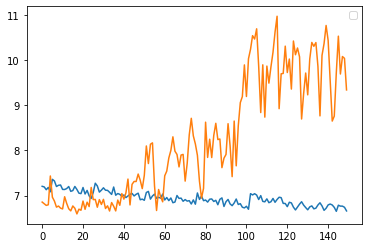

Train on 8000 samples, validate on 2000 samples
Epoch 1/150
8000/8000 [==============================] - 0s 21us/step - loss: 15.4008 - mean_absolute_error: 3.6718 - val_loss: 8.4532 - val_mean_absolute_error: 2.6888
Epoch 2/150
8000/8000 [==============================] - 0s 22us/step - loss: 9.7133 - mean_absolute_error: 2.8875 - val_loss: 2.8627 - val_mean_absolute_error: 1.3862
Epoch 3/150
8000/8000 [==============================] - 0s 22us/step - loss: 3.6851 - mean_absolute_error: 1.6341 - val_loss: 1.8806 - val_mean_absolute_error: 1.0651
Epoch 4/150
8000/8000 [==============================] - 0s 21us/step - loss: 1.6709 - mean_absolute_error: 1.0223 - val_loss: 1.6191 - val_mean_absolute_error: 0.9941
Epoch 5/150
8000/8000 [==============================] - 0s 22us/step - loss: 1.2131 - mean_absolute_error: 0.8679 - val_loss: 1.3575 - val_mean_absolute_error: 0.9239
Epoch 6/150
8000/8000 [==============================] - 0s 21us/step - loss: 1.1354 - mean_absolute_error: 0.8

No handles with labels found to put in legend.


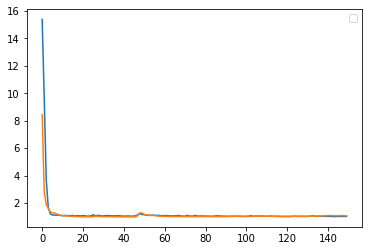

Train on 8000 samples, validate on 2000 samples
Epoch 1/150
8000/8000 [==============================] - 0s 21us/step - loss: 31.1968 - mean_absolute_error: 4.8627 - val_loss: 29.7443 - val_mean_absolute_error: 4.7065
Epoch 2/150
8000/8000 [==============================] - 0s 21us/step - loss: 18.6910 - mean_absolute_error: 3.5181 - val_loss: 23.2173 - val_mean_absolute_error: 4.0227
Epoch 3/150
8000/8000 [==============================] - 0s 22us/step - loss: 11.5878 - mean_absolute_error: 2.6919 - val_loss: 17.7735 - val_mean_absolute_error: 3.4057
Epoch 4/150
8000/8000 [==============================] - 0s 21us/step - loss: 10.3138 - mean_absolute_error: 2.5339 - val_loss: 15.4938 - val_mean_absolute_error: 3.1463
Epoch 5/150
8000/8000 [==============================] - 0s 21us/step - loss: 9.9451 - mean_absolute_error: 2.4953 - val_loss: 14.1846 - val_mean_absolute_error: 2.9949
Epoch 6/150
8000/8000 [==============================] - 0s 22us/step - loss: 9.6337 - mean_absolute_er

No handles with labels found to put in legend.


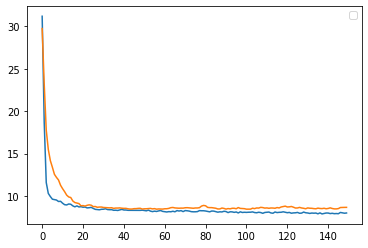

Train on 8000 samples, validate on 2000 samples
Epoch 1/150
8000/8000 [==============================] - 0s 21us/step - loss: 33.3586 - mean_absolute_error: 5.3787 - val_loss: 23.6821 - val_mean_absolute_error: 4.5107
Epoch 2/150
8000/8000 [==============================] - 0s 22us/step - loss: 16.7705 - mean_absolute_error: 3.4901 - val_loss: 11.3795 - val_mean_absolute_error: 2.9459
Epoch 3/150
8000/8000 [==============================] - 0s 21us/step - loss: 6.1864 - mean_absolute_error: 2.0262 - val_loss: 7.0439 - val_mean_absolute_error: 2.1940
Epoch 4/150
8000/8000 [==============================] - 0s 21us/step - loss: 4.2758 - mean_absolute_error: 1.6825 - val_loss: 8.5407 - val_mean_absolute_error: 2.4448
Epoch 5/150
8000/8000 [==============================] - 0s 21us/step - loss: 3.9381 - mean_absolute_error: 1.6219 - val_loss: 9.1551 - val_mean_absolute_error: 2.5478
Epoch 6/150
8000/8000 [==============================] - 0s 21us/step - loss: 3.9346 - mean_absolute_error: 

No handles with labels found to put in legend.


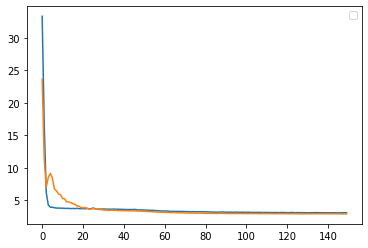

IndexError: ignored

In [30]:
for i in range(len(yData)):
    history = model.fit(xData, yData.iloc[:,i], epochs=150, batch_size=1000, validation_split=0.2, verbose=1)

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.legend()
    plt.show()

Train on 8000 samples, validate on 2000 samples
Epoch 1/150
8000/8000 [==============================] - 2s 217us/step - loss: 62.9072 - mean_absolute_error: 7.1249 - val_loss: 49.2487 - val_mean_absolute_error: 5.9333
Epoch 2/150
8000/8000 [==============================] - 0s 25us/step - loss: 48.2874 - mean_absolute_error: 5.9613 - val_loss: 39.8616 - val_mean_absolute_error: 5.0568
Epoch 3/150
8000/8000 [==============================] - 0s 22us/step - loss: 45.3153 - mean_absolute_error: 5.7132 - val_loss: 41.2193 - val_mean_absolute_error: 5.2935
Epoch 4/150
8000/8000 [==============================] - 0s 21us/step - loss: 43.3159 - mean_absolute_error: 5.4917 - val_loss: 47.2505 - val_mean_absolute_error: 5.9228
Epoch 5/150
8000/8000 [==============================] - 0s 21us/step - loss: 41.4945 - mean_absolute_error: 5.2815 - val_loss: 43.1939 - val_mean_absolute_error: 5.5171
Epoch 6/150
8000/8000 [==============================] - 0s 21us/step - loss: 39.7073 - mean_absolute

No handles with labels found to put in legend.


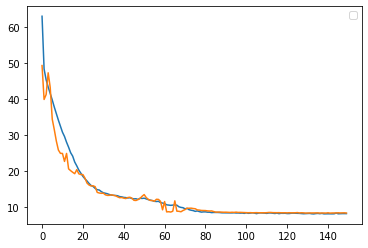

In [32]:
from keras.optimizers import SGD, Adam
from keras import metrics 
from keras.layers import ELU, ELU


model = Sequential()
model.add(Dense(148, input_dim=74, kernel_initializer='normal'))
model.add(BatchNormalization())
model.add(ELU(alpha=0.3))
model.add(Dropout(0.2))
model.add(Dense(296, kernel_initializer='normal'))
model.add(BatchNormalization())
model.add(ELU(alpha=0.3))
model.add(Dropout(0.2))
model.add(Dense(592, kernel_initializer='normal'))
model.add(BatchNormalization())
model.add(ELU(alpha=0.3))
model.add(Dropout(0.2))
model.add(Dense(1184, kernel_initializer='normal'))
model.add(BatchNormalization())
model.add(ELU(alpha=0.3))
model.add(Dropout(0.2))
model.add(Dense(1184, kernel_initializer='normal'))
model.add(BatchNormalization())
model.add(ELU(alpha=0.3))
model.add(Dropout(0.2))
model.add(Dense(592, kernel_initializer='normal'))
model.add(BatchNormalization())
model.add(ELU(alpha=0.3))
model.add(Dropout(0.2))
model.add(Dense(296, kernel_initializer='normal'))
model.add(BatchNormalization())
model.add(ELU(alpha=0.3))
model.add(Dropout(0.2))
model.add(Dense(74, kernel_initializer='normal'))
model.add(BatchNormalization())
model.add(ELU(alpha=0.3))
model.add(Dropout(0.2))
model.add(Dense(1, activation='relu'))
model.compile(loss='mean_squared_error',
              optimizer=Adam(lr=0.001),
              metrics=[metrics.mae])




history = model.fit(xData, yData.iloc[:,2], epochs=150, batch_size=1000, validation_split=0.2, verbose=1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend()
plt.show()

In [56]:
from keras.optimizers import SGD, Adam
from keras import metrics 
from keras.layers import ELU, ELU


model = Sequential()
model.add(Dense(148, input_dim=74, kernel_initializer='uniform'))
model.add(BatchNormalization())
model.add(ELU(alpha=0.3))
model.add(Dropout(0.2))
model.add(Dense(296, kernel_initializer='uniform'))
model.add(BatchNormalization())
model.add(ELU(alpha=0.3))
model.add(Dropout(0.2))
model.add(Dense(592, kernel_initializer='uniform'))
model.add(BatchNormalization())
model.add(ELU(alpha=0.3))
model.add(Dropout(0.2))
model.add(Dense(1184, kernel_initializer='uniform'))
model.add(BatchNormalization())
model.add(ELU(alpha=0.3))
model.add(Dropout(0.2))
model.add(Dense(1184, kernel_initializer='uniform'))
model.add(BatchNormalization())
model.add(ELU(alpha=0.3))
model.add(Dropout(0.2))
model.add(Dense(592, kernel_initializer='uniform'))
model.add(BatchNormalization())
model.add(ELU(alpha=0.3))
model.add(Dropout(0.2))
model.add(Dense(296, kernel_initializer='uniform'))
model.add(BatchNormalization())
model.add(ELU(alpha=0.3))
model.add(Dropout(0.2))
model.add(Dense(74, kernel_initializer='uniform'))
model.add(BatchNormalization())
model.add(ELU(alpha=0.3))
model.add(Dropout(0.2))
model.add(Dense(4, activation='relu'))
model.compile(loss='mean_squared_error',
              optimizer=Adam(lr=0.001),
              metrics=[metrics.mae])

train_history = model.fit(xData, yData, epochs=150, batch_size=500, validation_split=0.2, verbose=1)

Train on 8000 samples, validate on 2000 samples
Epoch 1/150
8000/8000 [==============================] - 2s 195us/step - loss: 33.5623 - mean_absolute_error: 4.8165 - val_loss: 38.9822 - val_mean_absolute_error: 5.3506
Epoch 2/150
8000/8000 [==============================] - 0s 38us/step - loss: 26.9070 - mean_absolute_error: 4.2170 - val_loss: 25.1851 - val_mean_absolute_error: 4.0938
Epoch 3/150
8000/8000 [==============================] - 0s 38us/step - loss: 23.6791 - mean_absolute_error: 3.8511 - val_loss: 18.3042 - val_mean_absolute_error: 3.2482
Epoch 4/150
8000/8000 [==============================] - 0s 37us/step - loss: 21.0668 - mean_absolute_error: 3.5325 - val_loss: 14.9794 - val_mean_absolute_error: 2.8057
Epoch 5/150
8000/8000 [==============================] - 0s 37us/step - loss: 18.7239 - mean_absolute_error: 3.2439 - val_loss: 12.7785 - val_mean_absolute_error: 2.5400
Epoch 6/150
8000/8000 [==============================] - 0s 38us/step - loss: 16.9616 - mean_absolute

In [22]:
train_history.history
# model.predict(xTest)

{'loss': [6.971498981951223e+17,
  6.971498884369565e+17,
  6.971498434944188e+17,
  6.97149875105378e+17,
  6.971498786787909e+17,
  6.971498924226862e+17,
  6.97149899019756e+17,
  6.97149875380256e+17,
  6.971498943468316e+17,
  6.971498693329421e+17,
  6.971498577880699e+17,
  6.971498676836746e+17,
  6.971498896739072e+17,
  6.971498423949071e+17,
  6.971498379968607e+17,
  6.9714983414857e+17,
  6.971498110588257e+17,
  6.971497937415176e+17,
  6.971497769739653e+17,
  6.971497555334885e+17,
  6.971497868695699e+17,
  6.97149804461756e+17,
  6.971497907178606e+17,
  6.971497890685932e+17,
  6.97149772026163e+17,
  6.971497522349537e+17,
  6.971497478369071e+17,
  6.971497527847095e+17,
  6.971497464625176e+17,
  6.971497819217677e+17,
  6.971497296949652e+17,
  6.971497318939886e+17,
  6.971497208988723e+17,
  6.97149742339349e+17,
  6.971497192496049e+17,
  6.97149721723506e+17,
  6.971496725203607e+17,
  6.971496949229101e+17,
  6.971496475064712e+17,
  6.971496557528083e+17,
 

In [0]:
sample_submission.iloc[:,1:] = model.predict(xTest)

In [26]:
sample_submission.head()

,id,hhb,hbo2,ca,na
0,10000,0.0,509.941193,0.0,448.837677
1,10001,0.0,544.801697,0.0,479.671234
2,10002,0.0,558.287598,0.0,491.341003
3,10003,0.0,610.785217,0.0,536.884460
4,10004,0.0,795.161377,0.0,699.466858


In [0]:
sample_submission.to_csv(path+'test_submission.csv', index=False)

## Feature Engineering

In [0]:
# col diff 추가
# col div 추가
src_cols = trainTransform.filter(regex='src').columns
for i in range(len(src_cols)-1):
    trainTransform[f'{src_cols[i+1]}-{src_cols[i]}'] = trainTransform[src_cols[i+1]] - trainTransform[src_cols[i]]
    testTransform[f'{src_cols[i+1]}-{src_cols[i]}'] = testTransform[src_cols[i+1]] - testTransform[src_cols[i]]
    trainTransform[f'{src_cols[i+1]}/{src_cols[i]}'] = trainTransform[src_cols[i+1]] / (trainTransform[src_cols[i]] + 1e-20)
    testTransform[f'{src_cols[i+1]}/{src_cols[i]}'] = testTransform[src_cols[i+1]] / (testTransform[src_cols[i]] + 1e-20)

dst_cols = trainTransform.filter(regex='dst').columns
for i in range(len(dst_cols)-1):
    trainTransform[f'{dst_cols[i+1]}-{dst_cols[i]}'] = trainTransform[dst_cols[i+1]] - trainTransform[dst_cols[i]]
    testTransform[f'{dst_cols[i+1]}-{dst_cols[i]}'] = testTransform[dst_cols[i+1]] - testTransform[dst_cols[i]]
    trainTransform[f'{dst_cols[i+1]}/{dst_cols[i]}'] = trainTransform[dst_cols[i+1]] / (trainTransform[dst_cols[i]] + 1e-20)
    testTransform[f'{dst_cols[i+1]}/{dst_cols[i]}'] = testTransform[dst_cols[i+1]] / (testTransform[dst_cols[i]] + 1e-20)

In [0]:
yData = train.loc[:,['hhb', 'hbo2', 'ca', 'na']]
xData = trainTransform.loc[:,~trainTransform.columns.isin(['id','hhb', 'hbo2', 'ca', 'na'])]
xTest = testTransform.loc[:,~testTransform.columns.isin(['id','hhb', 'hbo2', 'ca', 'na'])]

In [0]:
print(xData.shape, xTest.shape, yData.shape)

(10000, 207) (10000, 207) (10000, 4)


In [0]:
print(trainTransform.shape, testTransform.shape)
print(xData.shape, xTest.shape, yData.shape)
xData

(10000, 212) (10000, 208)
(10000, 207) (10000, 207) (10000, 4)


,rho,650_src,660_src,670_src,680_src,690_src,700_src,710_src,720_src,730_src,740_src,750_src,760_src,770_src,780_src,790_src,800_src,810_src,820_src,830_src,840_src,850_src,860_src,870_src,880_src,890_src,900_src,910_src,920_src,930_src,940_src,950_src,960_src,970_src,980_src,990_src,650_dst,660_dst,670_dst,680_dst,...,800_dst-790_dst,800_dst/790_dst,810_dst-800_dst,810_dst/800_dst,820_dst-810_dst,820_dst/810_dst,830_dst-820_dst,830_dst/820_dst,840_dst-830_dst,840_dst/830_dst,850_dst-840_dst,850_dst/840_dst,860_dst-850_dst,860_dst/850_dst,870_dst-860_dst,870_dst/860_dst,880_dst-870_dst,880_dst/870_dst,890_dst-880_dst,890_dst/880_dst,900_dst-890_dst,900_dst/890_dst,910_dst-900_dst,910_dst/900_dst,920_dst-910_dst,920_dst/910_dst,930_dst-920_dst,930_dst/920_dst,940_dst-930_dst,940_dst/930_dst,950_dst-940_dst,950_dst/940_dst,960_dst-950_dst,960_dst/950_dst,970_dst-960_dst,970_dst/960_dst,980_dst-970_dst,980_dst/970_dst,990_dst-980_dst,990_dst/980_dst
0,25.0,0.37950,0.42993,0.52076,0.57166,0.67818,0.75476,0.83580,0.93623,0.96333,1.01541,0.99865,0.94373,0.84513,0.74023,0.68776,0.57697,0.51536,0.43508,0.36501,0.34935,0.30038,0.26992,0.23192,0.21998,0.19920,0.14493,0.13150,0.12442,0.10786,0.11984,0.09851,0.10965,0.07424,0.07777,0.05536,2.447758e-18,1.894578e-18,0.000000e+00,6.412913e-18,...,4.907490e-17,1.882702,-3.228233e-17,0.691454,0.000000e+00,0.999862,-3.215138e-17,0.555644,-1.624121e-17,0.596003,-5.273360e-18,0.779721,-6.123211e-19,0.966741,-1.808920e-17,0.000000,0.000000e+00,0.000000,2.626216e-18,262.621649,9.011546e-19,1.338043,0.000000e+00,9.971730e-01,-2.881815e-18,0.182496,0.000000e+00,0.984746,-6.455564e-19,0.000000,0.000000e+00,0.000000,1.067504e-18,1.067504e+02,0.000000e+00,9.907193e-01,4.931445e-18,5.567448,3.778618e-17,7.286654
1,10.0,0.00000,0.00000,0.01813,0.00000,0.00000,0.01974,0.00321,0.00000,0.00000,0.01295,0.00000,0.01565,0.00000,0.00000,0.01285,0.01129,0.00359,0.00000,0.00000,0.00000,0.00000,0.00000,0.04466,0.10738,0.21646,0.41456,0.63716,0.84230,0.97480,0.99803,0.97146,0.87045,0.75330,0.63414,0.53699,0.000000e+00,0.000000e+00,0.000000e+00,1.995530e-10,...,-1.616721e-10,0.801357,-3.789878e-10,0.418918,0.000000e+00,1.000000,-1.965905e-10,0.280476,0.000000e+00,1.000000,6.231695e-11,1.813190,0.000000e+00,1.000000,1.333333e-09,10.595799,-2.181906e-11,0.985180,-2.251418e-10,0.844779,1.422312e-09,2.160767,2.585847e-09,1.976664e+00,0.000000e+00,1.000000,7.408895e-09,2.415673,7.889430e-10,1.062405,-7.318634e-09,0.455107,-3.982138e-09,3.485452e-01,7.579544e-09,4.557558e+00,0.000000e+00,1.000000,-9.710091e-09,0.000000
2,25.0,0.00000,0.03289,0.02416,0.03610,0.05843,0.09015,0.14944,0.18578,0.25584,0.30445,0.38962,0.50472,0.56934,0.67742,0.79720,0.87593,0.92783,0.99498,0.98682,0.98988,0.95101,0.89853,0.79813,0.68262,0.58043,0.46222,0.39113,0.27879,0.19070,0.16603,0.11617,0.06744,0.02343,0.03926,0.03136,1.677445e-19,3.763590e-20,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000,9.912979e-18,991.297942,1.214489e-18,1.121384,-1.100145e-17,0.011315,0.000000e+00,0.926483,0.000000e+00,0.926483,0.000000e+00,0.926483,-1.260239e-19,0.000000,0.000000e+00,0.000000,3.876159e-18,387.615944,7.529654e-19,1.191182,-3.219712e-18,3.038102e-01,1.828067e-18,2.280858,-3.237480e-18,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.329725e-18,132.972481,-1.329725e-18,0.000000
3,10.0,0.27503,0.31281,0.32898,0.41041,0.46587,0.52769,0.64369,0.73562,0.79865,0.91482,0.95274,0.99391,1.00563,0.93165,0.84703,0.74997,0.67765,0.58432,0.50642,0.43087,0.35684,0.30786,0.27722,0.24119,0.20158,0.17876,0.15139,0.15656,0.13392,0.14247,0.10126,0.09928,0.09239,0.10523,0.06349,4.044975e-11,5.345363e-11,5.345363e-11,9.106886e-12,...,4.093581e-10,1.180349,-1.409635e-10,0.947385,-4.913590e-10,0.806414,-5.300208e-10,0.741054,-1.888130e-10,0.875521,-2.666481e-10,0.799212,-1.979576e-10,0.813487,-2.829066e-10,0.672335,-2.189884e-10,0.622756,-2.340191e-10,0.352656,0.000000e+00,1.000000,-6.629814e-11,4.799640e-01,1.0

In [0]:
xData['rho']

0       25.0
1       10.0
2       25.0
3       10.0
4       15.0
        ... 
9995    15.0
9996    20.0
9997    10.0
9998    15.0
9999    10.0
Name: rho, Length: 10000, dtype: float64

In [0]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler


scaler = StandardScaler()
# scaler = MinMaxScaler()

# xData = xData.fillna(0)
# xTest = xTest.fillna(0)
xDataScaled = scaler.fit_transform(xData.iloc[:,1:])
xTestScaled = scaler.transform(xTest.iloc[:,1:])

In [0]:
# xData.iloc[:,:] = xDataScaled
# xTest.iloc[:,:] = xTestScaled

In [0]:
xData.iloc[:,1:] = xDataScaled
xTest.iloc[:,1:] = xTestScaled

In [0]:
# xTrn, xTst, yTrn, yTst = train_test_split(xDataScaled, yData, test_size=0.2, random_state=42)

In [0]:
import lightgbm as lgbm
import xgboost as xgb                       # XGBoost 패키지
from sklearn.model_selection import KFold   # K-Fold CV

import warnings
warnings.filterwarnings(action='ignore') 

In [0]:
def train_lgbm_model(x_data, y_data, k=5):
    models = []

    kfold = KFold(n_splits=k, shuffle=True, random_state=10)

    for trn_idx, val_idx in kfold.split(x_data):
        x_trn, y_trn = x_data[trn_idx], y_data[trn_idx]
        x_val, y_val = x_data[val_idx], y_data[val_idx]

        trainData = lgbm.Dataset(x_trn, y_trn)
        testData = lgbm.Dataset(x_val, y_val)

        lgb_param = {
            'objective': 'regression', 
            # 'boosting_type': 'dart',
            # 'boosting'  : 'dart',
            'n_estimators': 1000,
            'drop_rate': 0.8, 
            'skip_drop': 0.8, 
            'silent' : False,
            'learning_rate' : 0.05,
            'max_depth' : 12,
            'random_state' : 42,
            'n_jobs' : -1,
            'metric' : 'l1',
            'colsample_bytree' : 0.7,
            'subsample' : 0.7,
            }
        model = lgbm.train(lgb_param, train_set=trainData, num_boost_round=3000, 
                           valid_sets = testData, 
                           verbose_eval=100,
                           early_stopping_rounds=500 # Dart earlystopping 안됨
                           )
        models.append(model)

    return models

In [0]:
# 각 target column별 model 4개 생성 hhb hhb? na ca
models = {}

for label in yData.columns:
    print("train column : ", label)
    models[label] = train_lgbm_model(np.array(xData), yData[label])

train column :  hhb
Training until validation scores don't improve for 500 rounds.
[100]	valid_0's l1: 0.988585
[200]	valid_0's l1: 0.906852
[300]	valid_0's l1: 0.885923
[400]	valid_0's l1: 0.877718
[500]	valid_0's l1: 0.871107
[600]	valid_0's l1: 0.867838
[700]	valid_0's l1: 0.863183
[800]	valid_0's l1: 0.859853
[900]	valid_0's l1: 0.858026
[1000]	valid_0's l1: 0.856995
Did not meet early stopping. Best iteration is:
[988]	valid_0's l1: 0.856957
Training until validation scores don't improve for 500 rounds.
[100]	valid_0's l1: 0.961932
[200]	valid_0's l1: 0.880199
[300]	valid_0's l1: 0.860837
[400]	valid_0's l1: 0.852286
[500]	valid_0's l1: 0.846245
[600]	valid_0's l1: 0.84352
[700]	valid_0's l1: 0.841062
[800]	valid_0's l1: 0.839637
[900]	valid_0's l1: 0.837994
[1000]	valid_0's l1: 0.838057
Did not meet early stopping. Best iteration is:
[949]	valid_0's l1: 0.837686
Training until validation scores don't improve for 500 rounds.
[100]	valid_0's l1: 0.978397
[200]	valid_0's l1: 0.89233

In [0]:
for col in models:
    preds = []
    for model in models[col]:
        preds.append(model.predict(np.array(xTest)))
    pred = np.mean(preds, axis=0)

    sample_submission[col] = pred

In [0]:
sample_submission

,id,hhb,hbo2,ca,na
0,10000,8.612400,4.689794,9.237499,3.643190
1,10001,6.445094,3.103209,7.763366,3.457627
2,10002,9.952573,4.866020,11.674985,3.249382
3,10003,8.535031,4.165884,10.301540,4.383614
4,10004,5.625050,3.369389,9.995656,3.847026
...,...,...,...,...,...
9995,19995,4.550471,4.174847,11.216938,4.016303
9996,19996,11.626364,3.026058,5.924349,2.973182
9997,19997,7.016182,3.964192,8.047819,3.726024
9998,19998,12.585096,4.332496,9.496307,3.458499


In [0]:
sample_submission.to_csv(path+'col_diff_col_div.csv', index=False) 